In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = './data/'

files = [filename for filename in os.listdir(path) if os.path.isdir(os.path.join(path,filename))]
odds = []
scores = []

for file in files:
    temp_odds = pd.read_csv(path+file+'/vegas.txt',index_col=0,parse_dates=True)
    temp_scores = pd.read_csv(path+file+'/raw_scores.txt',index_col=0,parse_dates=True)
    odds.append(temp_odds)
    scores.append(temp_scores)
    
master_odds = pd.concat(odds,axis=0)
master_scores = pd.concat(scores,axis=0)

## EDA on O/U Betting Data
----

In [160]:
def find_columns(columns, keyword):
    #retains and returns the columns (list) that contain the keyword (string).
    
    retained_cols = []
    for feature in columns:
        if feature.find(keyword)!= -1:
            retained_cols.append(feature)
    
    print(f'Found columns with keyword {keyword}: {retained_cols}')
    
    return retained_cols

In [161]:
OU_cols = find_columns(master_odds, 'OU')
basic_cols = ['Location', 'Team', 'OppTeam', 'TeamId', 'GameId', 'Pts', 'Spread', 'Result', 'Total']

master_OU = master_odds[basic_cols+OU_cols]
master_OU['year'] = master_OU.index.year
master_OU.head()

Found columns with keyword OU: ['PercentBet_OU', 'Open_Line_OU', 'Open_Odds_OU', 'Pinnacle_Line_OU', 'Pinnacle_Odds_OU', '5dimes_Line_OU', '5dimes_Odds_OU', 'Heritage_Line_OU', 'Heritage_Odds_OU', 'Bovada_Line_OU', 'Bovada_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU', 'Average_Line_OU', 'Average_Odds_OU', 'Best_Line_OU', 'Worst_Line_OU', 'Best_Odds_OU', 'Worst_Odds_OU']


<ipython-input-161-6bcf25eaa8d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_OU['year'] = master_OU.index.year


,Location,Team,OppTeam,TeamId,GameId,Pts,Spread,Result,Total,PercentBet_OU,...,Bovada_Odds_OU,Betonline_Line_OU,Betonline_Odds_OU,Average_Line_OU,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,year
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-17,away,Boston,Cleveland,1610612738,21700001,99.0,-3.0,L,201.0,47.0,...,-110.0,216.0,-110.0,216.17,-106.83,216.5,216.0,-101.0,-110.0,2017
2017-10-17,home,Cleveland,Boston,1610612739,21700001,102.0,3.0,W,201.0,53.0,...,-110.0,216.0,-110.0,216.17,-108.17,216.5,216.0,-105.0,-110.0,2017
2017-10-17,away,Houston,Golden State,1610612745,21700002,122.0,1.0,W,243.0,43.1,...,-115.0,230.5,-115.0,231.75,-109.67,235.0,230.5,-103.0,-115.0,2017
2017-10-17,home,Golden State,Houston,1610612744,21700002,121.0,-1.0,L,243.0,56.9,...,-105.0,230.5,-105.0,231.75,-105.33,235.0,230.5,-100.0,-110.0,2017
2017-10-18,away,Charlotte,Detroit,1610612766,21700003,90.0,-12.0,L,192.0,42.9,...,-110.0,202.0,-115.0,202.17,-107.83,203.0,202.0,-102.0,-115.0,2017


<Axes: xlabel='Year', ylabel='Total'>

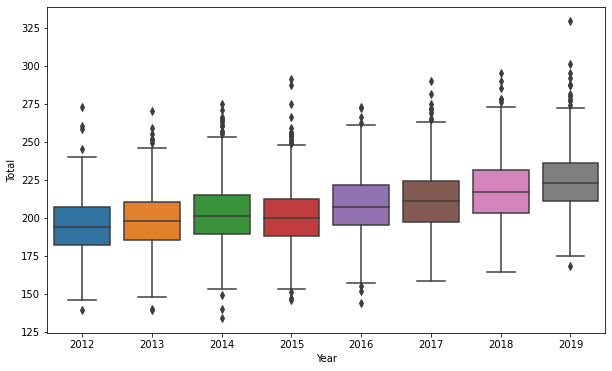

In [162]:
avg_OU_years = master_OU[master_OU['Location'] == 'away'][['Total','year']]
avg_OU_years['Year'] = avg_OU_years.index.year

plt.subplots(figsize=(10,6))
sns.boxplot(x='Year',y='Total',data=avg_OU_years)

In [198]:
master_scores[master_scores['GAME_ID'] == 21701171]

,GAME_SEQUENCE,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY_NAME,TEAM_WINS_LOSSES,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,...,PTS_OT8,PTS_OT9,PTS_OT10,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV
2018-04-04,4,21701171,1610612738,BOS,Boston,53-25,20,13,20,25,...,0.0,0.0,0.0,78,0.333,0.893,0.136,10,43,16
2018-04-04,4,21701171,1610612761,TOR,Toronto,56-22,14,29,24,29,...,0.0,0.0,0.0,96,0.435,0.750,0.303,23,48,10


In [199]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix()